In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# -----------------------------
# 1. 构造真实感数据
# -----------------------------
np.random.seed(0)

n = 30  # 样本数

# 两个真实特征：面积 & 距离
area = np.random.uniform(50, 150, n)        # 平方米
distance = np.random.uniform(1, 15, n)      # 公里

# 真实参数（假设）
beta_true = np.array([2.0, 0.05, -0.8])  # 截距、面积系数、距离系数

In [4]:
# 构造设计矩阵
X = np.column_stack([
    np.ones(n),
    area,
    distance
])

# 房价（加入噪声）
noise = np.random.normal(0, 2, n)
y = X @ beta_true + noise

In [5]:
# -----------------------------
# 2. 最小二乘解
# -----------------------------
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
y_hat = X @ beta_hat
r = y - y_hat

print("最小二乘估计 beta_hat：")
print(beta_hat)

最小二乘估计 beta_hat：
[-0.07843944  0.05354176 -0.65470694]


In [6]:
# 验证正交性：X^T r ≈ 0
print("\nX^T r（应接近 0）：")
print(X.T @ r)


X^T r（应接近 0）：
[-2.62012634e-14  1.59161573e-12 -7.88702437e-13]


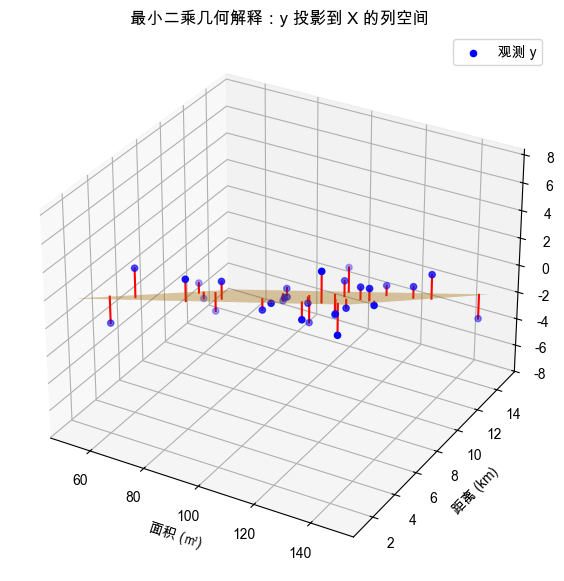

In [7]:
# -----------------------------
# 3. 几何可视化（只画两个特征）
# -----------------------------
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 原始数据点
ax.scatter(area, distance, y, color='blue', label='观测 y')

# 拟合平面
area_grid, dist_grid = np.meshgrid(
    np.linspace(area.min(), area.max(), 20),
    np.linspace(distance.min(), distance.max(), 20)
)

y_plane = (
    beta_hat[0]
    + beta_hat[1] * area_grid
    + beta_hat[2] * dist_grid
)

ax.plot_surface(area_grid, dist_grid, y_plane,
                alpha=0.4, color='orange')

# 残差向量（从投影点到真实 y）
for i in range(n):
    ax.plot(
        [area[i], area[i]],
        [distance[i], distance[i]],
        [y_hat[i], y[i]],
        color='red'
    )

ax.set_xlabel("面积 (㎡)")
ax.set_ylabel("距离 (km)")
ax.set_zlabel("房价 (万元)")
ax.set_title("最小二乘几何解释：y 投影到 X 的列空间")

ax.legend()
plt.show()

In [9]:
import numpy as np

np.random.seed(0)

# 样本数
n = 30

# 两个特征
area = np.random.uniform(50, 150, n)
distance = np.random.uniform(1, 15, n)

# 构造设计矩阵（不画截距，方便几何理解）
X = np.column_stack([area, distance])

# 真实参数（假设）
beta_true = np.array([0.08, -1.2])

# 房价（加入噪声）
y = X @ beta_true + np.random.normal(0, 5, n)

# 最小二乘解
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print("回归系数 beta_hat =", beta_hat)


回归系数 beta_hat = [ 0.05417303 -1.00183866]


In [10]:
# -----------------------------
# 1. 构造几何意义上的 X_geom
# -----------------------------
# 两个“特征方向”作为列空间基
x1 = np.array([1, 0, 1], dtype=float)
x2 = np.array([0, 1, 1], dtype=float)

X_geom = np.column_stack([x1, x2])

# 用真实回归系数生成投影向量
y_proj = X_geom @ beta_hat

# 构造一个不在平面上的 y（加入正交分量）
normal = np.cross(x1, x2)
normal = normal / np.linalg.norm(normal)

y_geom = y_proj + 2.5 * normal
r = y_geom - y_proj

print("X_geom^T r =", X_geom.T @ r)

X_geom^T r = [0. 0.]


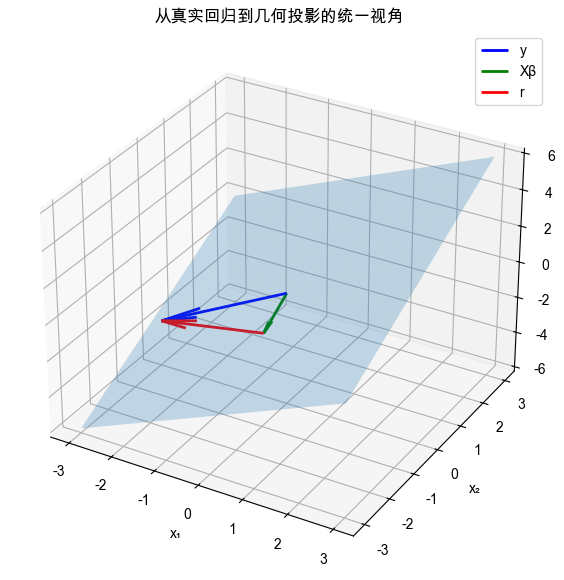

In [11]:
# -----------------------------
# 2. 构造列空间平面
# -----------------------------
a = np.linspace(-3, 3, 10)
b = np.linspace(-3, 3, 10)
A, B = np.meshgrid(a, b)

plane_x = A * x1[0] + B * x2[0]
plane_y = A * x1[1] + B * x2[1]
plane_z = A * x1[2] + B * x2[2]

# -----------------------------
# 3. 3D 可视化
# -----------------------------
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

# 列空间平面
ax.plot_surface(
    plane_x, plane_y, plane_z,
    alpha=0.25
)

# y 向量（蓝）
ax.quiver(0, 0, 0,
          y_geom[0], y_geom[1], y_geom[2],
          color='blue', linewidth=2, label='y')

# Xβ 投影向量（绿）
ax.quiver(0, 0, 0,
          y_proj[0], y_proj[1], y_proj[2],
          color='green', linewidth=2, label='Xβ')

# 残差向量 r（红）
ax.quiver(y_proj[0], y_proj[1], y_proj[2],
          r[0], r[1], r[2],
          color='red', linewidth=2, label='r')

ax.set_title("从真实回归到几何投影的统一视角")
ax.set_xlabel("x₁")
ax.set_ylabel("x₂")
ax.set_zlabel("x₃")
ax.legend()

plt.show()


In [12]:
import numpy as np

np.random.seed(1)

n = 40

area = np.random.uniform(60, 160, n)
distance = np.random.uniform(1, 20, n)

X = np.column_stack([area, distance])

beta_true = np.array([0.06, -1.0])
y = X @ beta_true + np.random.normal(0, 4, n)

# 最小二乘解
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y


In [13]:
# QR 分解（等价于 Gram–Schmidt）
Q, R = np.linalg.qr(X)

# 投影与残差
y_proj = Q @ Q.T @ y
r = y - y_proj

# 验证正交性
print("Q^T r ≈", Q.T @ r)


Q^T r ≈ [-5.77315973e-15 -1.77635684e-15]


In [14]:
import matplotlib.pyplot as plt

# 把 Q 的列映射到 3D（几何等价）
q1 = np.array([1.0, 0.0, 0.0])
q2 = np.array([0.0, 1.0, 0.0])

# 在 Q 基下的坐标
alpha = Q.T @ y

# 投影、残差在 3D 中的表示
y_proj_3d = alpha[0] * q1 + alpha[1] * q2
y_3d = y_proj_3d + np.array([0, 0, 2.0])
r_3d = y_3d - y_proj_3d


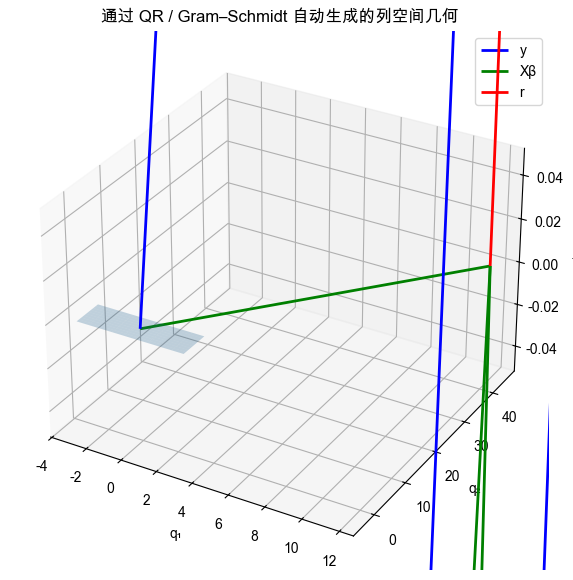

In [15]:
# 构造列空间平面
a = np.linspace(-3, 3, 10)
b = np.linspace(-3, 3, 10)
A, B = np.meshgrid(a, b)

plane_x = A
plane_y = B
plane_z = np.zeros_like(A)

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

# 平面
ax.plot_surface(plane_x, plane_y, plane_z, alpha=0.25)

# y（蓝）
ax.quiver(0, 0, 0,
          y_3d[0], y_3d[1], y_3d[2],
          color='blue', linewidth=2, label='y')

# Xβ = 投影（绿）
ax.quiver(0, 0, 0,
          y_proj_3d[0], y_proj_3d[1], y_proj_3d[2],
          color='green', linewidth=2, label='Xβ')

# r（红）
ax.quiver(y_proj_3d[0], y_proj_3d[1], y_proj_3d[2],
          r_3d[0], r_3d[1], r_3d[2],
          color='red', linewidth=2, label='r')

ax.set_title("通过 QR / Gram–Schmidt 自动生成的列空间几何")
ax.set_xlabel("q₁")
ax.set_ylabel("q₂")
ax.set_zlabel("⊥")

ax.legend()
plt.show()
